# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy
from functools import partial

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
M\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

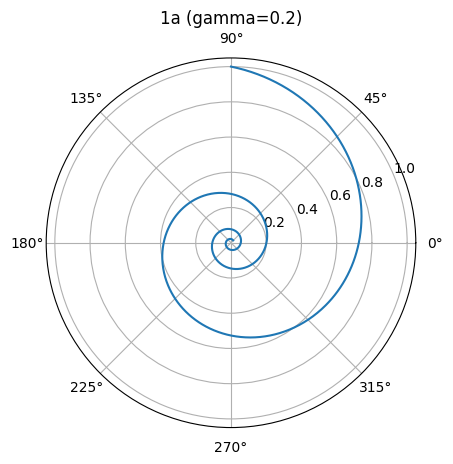

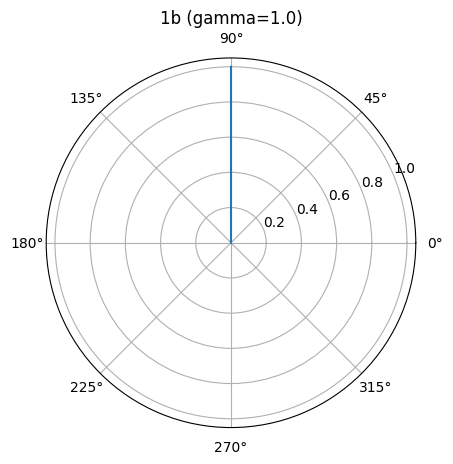

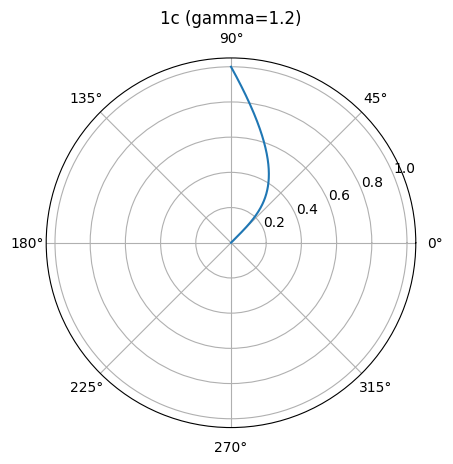

In [51]:
# TODO
# Prepare the input arguments
t0 = 0
tmax = 20
dt = 0.01
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)

M = 1
K = 1
W0 = np.sqrt(K/M)
PHI = -np.pi/2
A = 1

# define the driving acceleration function (in this case driven force is 0)
def drive_acc_const(t, f0):
    return f0/M

# define the y' funciotn
def func(t, y, w0, gamma, drive_acc):
    yderive = np.zeros(len(y))
    yderive[0] = y[1]
    yderive[1] = drive_acc(t) - w0*w0*y[0] - 2*gamma*y[1]
    return yderive

# define the stimulator function
def simulate(a, phi, func, w0, gamma, drive_acc):
    x0 = a * np.cos(phi)
    v0 = -a * w0 * np.sin(phi)
    y0 = np.array([x0, v0])

    results = mysolver.solve_ivp(func, t_span, y0, method="RK4", t_eval=t_eval, args=(w0, gamma, drive_acc))
    return results

def plot_phase_fig(title, y, w0, gamma):
    w1 = np.sqrt(abs(w0*w0 - gamma*gamma))
    u = w1 * y[0]
    w = gamma * y[0] + y[1]

    plt.figure()
    plt.polar(np.arctan2(w, u), np.sqrt(u*u + w*w))
    plt.title(f'{title} (gamma={gamma})')
    plt.savefig(f'{title}.png')
    plt.show()


sol_1a = simulate(A, PHI, func, W0, 0.2, partial(drive_acc_const, f0=0.0))
sol_1b = simulate(A, PHI, func, W0, 1.0, partial(drive_acc_const, f0=0.0))
sol_1c = simulate(A, PHI, func, W0, 1.2, partial(drive_acc_const, f0=0.0))
plot_phase_fig('1a', sol_1a, W0, 0.2)
plot_phase_fig('1b', sol_1b, W0, 1.0)
plot_phase_fig('1c', sol_1c, W0, 1.2)





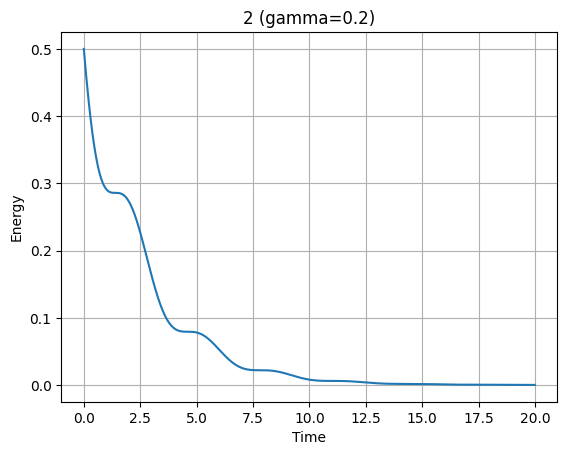

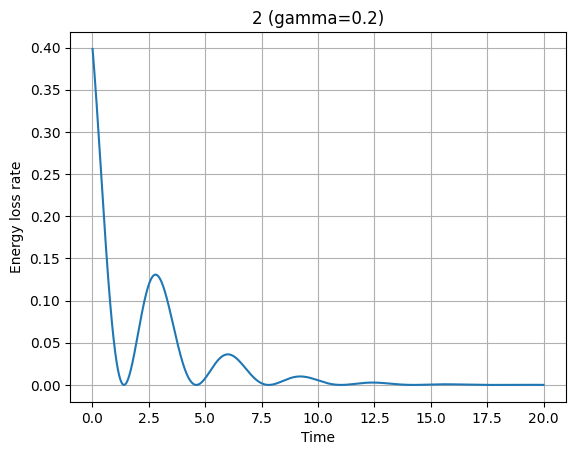

In [52]:
def plot_energy_and_loss_rate(title, y, gamma):
    x = y[0]
    v = y[1]
    e = (M*v*v + K*x*x)/2
    de = e[:-1] - e[1:]
    de = de/dt

    # total energy
    plt.figure()
    plt.plot(t_eval, e)
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.grid()
    plt.title(f'{title} (gamma={gamma})')
    plt.savefig(f'{title}_E.png')
    plt.show()
    plt.close()

    # energy loss rate
    plt.plot(t_eval[1:], de)
    plt.xlabel("Time")
    plt.ylabel("Energy loss rate")
    plt.grid()
    plt.title(f'{title} (gamma={gamma})')
    plt.savefig(f'{title}_dEdt.png')
    plt.show()
    plt.close()

# only damping
plot_energy_and_loss_rate("2", sol_1a, 0.2)

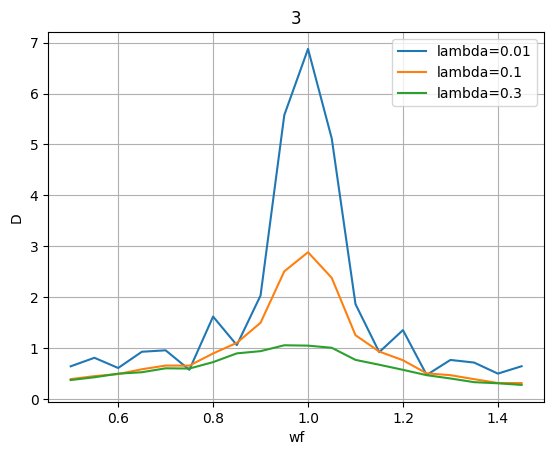

In [53]:
# TODO
# Prepare the input arguments
t0 = 0
tmax = 50
dt = 0.01
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)

wf_span = (0.5, 1.5)
wf_eval = np.arange(wf_span[0], wf_span[1], 0.05)

M = 1
K = 1
W0 = np.sqrt(K/M)
PHI = -np.pi/2
A = 1
F0 = 0.5

# define the driving acceleration function (in this case driven force is cos)
def drive_acc_cos(t, f0, wf):
    return f0*np.cos(wf*t)

def resonance(lam):
    gamma = lam/2/M
    D = []
    for wf in wf_eval:
        # results = simulate(A, PHI, func, W0, 1.2, partial(drive_acc_const, f0=0.0))
        results = simulate(A, PHI, func, W0, gamma, partial(drive_acc_cos, f0=F0, wf=wf))
        D.append(np.mean(np.abs(results[0, int(40/dt):int(50/dt)])))
    return D

def plot_resonance(title):
    sol_3a = resonance(0.01)
    sol_3b = resonance(0.1)
    sol_3c = resonance(0.3)

    plt.figure()
    plt.plot(wf_eval, sol_3a, label="lambda=0.01")
    plt.plot(wf_eval, sol_3b, label="lambda=0.1")
    plt.plot(wf_eval, sol_3c, label="lambda=0.3")
    plt.title(title)
    plt.xlabel("wf")
    plt.ylabel("D")
    plt.legend()
    plt.grid()
    # plt.savefig("resonance.png")
    plt.savefig(f'{title}.png')
    plt.show()

# plot_resonance()
plot_resonance('3')


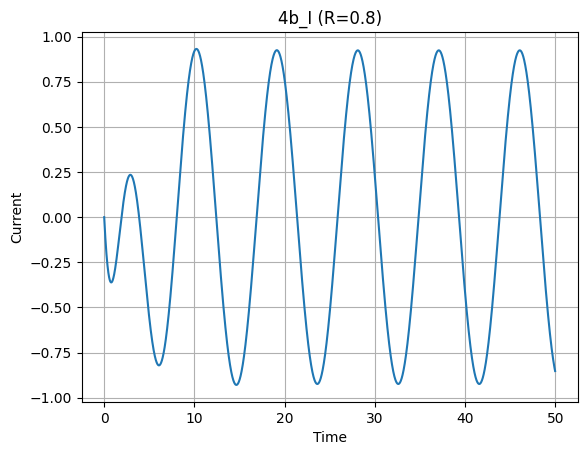

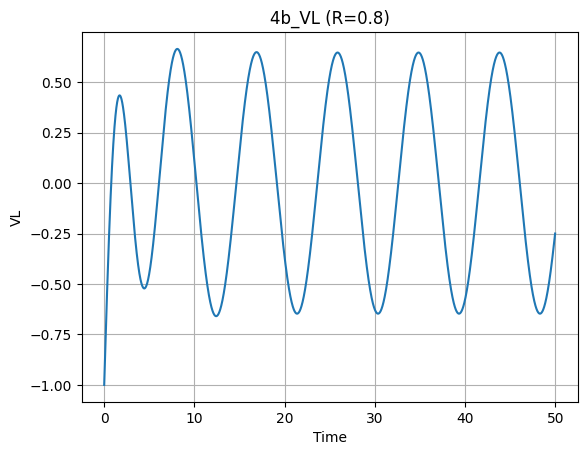

In [54]:
# TODO
# Prepare the input arguments
t0 = 0
tmax = 50
dt = 0.01
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)

wf_span = (0.5, 1.5)
wf_eval = np.arange(wf_span[0], wf_span[1], 0.05)

M = L = 1
C = 1
K = 1/C
W0 = np.sqrt(K/M)
PHI = 0
# PHI = -np.pi/2
A = 1
F0 = E0 = 1
R = 0.8
Wf = 0.7

# define the driving acceleration function (in this case driven force is cos)
def drive_acc_sin(t, f0, wf):
    return f0*np.sin(wf*t)

def rlc(lam):
    gamma = lam/2/M
    results = simulate(A, PHI, func, W0, gamma, partial(drive_acc_sin, f0=F0, wf=Wf))
    return results

def plot_rlc(title):
    sol_4b = rlc(R)
    q = sol_4b[0]
    i = sol_4b[1]
    vl = drive_acc_sin(t_eval,F0 ,Wf) - q/C - R*i



    # Current
    plt.figure()
    plt.plot(t_eval, i)
    plt.xlabel("Time")
    plt.ylabel("Current")
    plt.grid()
    plt.title(f'{title}_I (R={R})')
    plt.savefig(f'{title}_I.png')
    plt.show()
    plt.close()

    # Vl
    plt.plot(t_eval, vl)
    plt.xlabel("Time")
    plt.ylabel("VL")
    plt.grid()
    plt.title(f'{title}_VL (R={R})')
    plt.savefig(f'{title}_VL.png')
    plt.show()
    plt.close()

# plot_resonance()
plot_rlc('4b')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


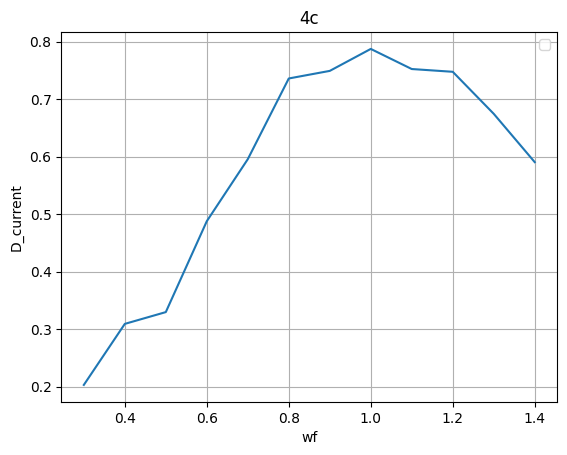

In [55]:
# TODO
# Prepare the input arguments
t0 = 0
tmax = 50
dt = 0.01
t_span = (t0, tmax)
t_eval = np.arange(t0, tmax, dt)

wf_span = (0.3, 1.5)
wf_eval = np.arange(wf_span[0], wf_span[1], 0.1)

M = L = 1
C = 1
K = 1/C
W0 = np.sqrt(K/M)
PHI = 0
# PHI = -np.pi/2
A = 1
F0 = E0 = 1
R = 0.8
Wf = 0.7

# define the driving acceleration function (in this case driven force is cos)
def drive_acc_sin(t, f0, wf):
    return f0*np.sin(wf*t)

def rlc_resonance(lam):
    gamma = lam/2/M
    D = []
    for wf in wf_eval:
        # results = simulate(A, PHI, func, W0, 1.2, partial(drive_acc_const, f0=0.0))
        results = simulate(A, PHI, func, W0, gamma, partial(drive_acc_sin, f0=F0, wf=wf))
        D.append(np.mean(np.abs(results[1, int(40/dt):int(50/dt)])))
    return D

def plot_rlc_resonance(title):
    sol_4c = rlc_resonance(R)

    plt.figure()
    plt.plot(wf_eval, sol_4c)
    plt.title(title)
    plt.xlabel("wf")
    plt.ylabel("D_current")
    plt.legend()
    plt.grid()
    # plt.savefig("resonance.png")
    plt.savefig(f'{title}.png')
    plt.show()

plot_rlc_resonance('4c')